In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pd.set_option('display.max_columns', 25)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project/report.csv')
df.head()

,CIK,CONAME,FYRMO,FDATE,FORM,SECFNAME,URL,positive score,negative score,polarity score,subjectivity score,average sentence length,complex words,percentage of complex word,fog index,constraining score,uncertainity score,word count,positive word proportion,negative word proportion,uncertainty word proportion,constraining word proportion,constraining words whole report
0,3662,SUNBEAM CORP/FL/,199803,1998-03-06,10-K405,edgar/data/3662/0000950170-98-000413.txt,https://www.sec.gov/Archives/edgar/data/3662/0...,2004,1207,0.248209,0.079276,192.013221,48540,30.384026,88.958899,401,123,40504,0.049477,0.029800,0.003037,0.009900,1483
1,3662,SUNBEAM CORP/FL/,199805,1998-05-15,10-Q,edgar/data/3662/0000950170-98-001001.txt,https://www.sec.gov/Archives/edgar/data/3662/0...,1170,763,0.210554,0.075270,276.686842,32522,30.931796,123.047455,309,118,25681,0.045559,0.029711,0.004595,0.012032,1042
2,3662,SUNBEAM CORP/FL/,199808,1998-08-13,NT 10-Q,edgar/data/3662/0000950172-98-000783.txt,https://www.sec.gov/Archives/edgar/data/3662/0...,5,1,0.666667,0.025641,164.800000,243,29.490291,77.716117,0,0,234,0.021368,0.004274,0.000000,0.000000,5
3,3662,SUNBEAM CORP/FL/,199811,1998-11-12,10-K/A,edgar/data/3662/0000950170-98-002145.txt,https://www.sec.gov/Archives/edgar/data/3662/0...,924,618,0.198444,0.076227,109.260255,25555,33.082191,56.936978,214,81,20229,0.045677,0.030550,0.004004,0.010579,715
4,3662,SUNBEAM CORP/FL/,199811,1998-11-16,NT 10-Q,edgar/data/3662/0000950172-98-001203.txt,https://www.sec.gov/Archives/edgar/data/3662/0...,6,1,0.714286,0.025000,146.571429,282,27.485380,69.622723,0,1,280,0.021429,0.003571,0.003571,0.000000,4


In [ ]:
df.shape

(152, 23)

In [ ]:
df.isnull().sum()

CIK                                0
CONAME                             0
FYRMO                              0
FDATE                              0
FORM                               0
SECFNAME                           0
URL                                0
positive score                     0
negative score                     0
polarity score                     0
subjectivity score                 0
average sentence length            0
complex words                      0
percentage of complex word         0
fog index                          0
constraining score                 0
uncertainity score                 0
word count                         0
positive word proportion           0
negative word proportion           0
uncertainty word proportion        0
constraining word proportion       0
constraining words whole report    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   CIK                              152 non-null    int64  
 1   CONAME                           152 non-null    object 
 2   FYRMO                            152 non-null    int64  
 3   FDATE                            152 non-null    object 
 4   FORM                             152 non-null    object 
 5   SECFNAME                         152 non-null    object 
 6   URL                              152 non-null    object 
 7   positive score                   152 non-null    int64  
 8   negative score                   152 non-null    int64  
 9   polarity score                   152 non-null    float64
 10  subjectivity score               152 non-null    float64
 11  average sentence length          152 non-null    float64
 12  complex words         

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CIK,152.0,5861.605263,2310.633436,3662.000000,4447.000000,5907.000000,6201.000000,12239.000000
FYRMO,152.0,200220.750000,429.991117,199402.000000,199906.000000,200101.500000,200605.500000,201407.000000
positive score,152.0,805.723684,3944.789235,1.000000,60.750000,145.500000,389.000000,38532.000000
negative score,152.0,293.059211,375.777732,0.000000,67.250000,160.500000,390.250000,2517.000000
polarity score,152.0,0.072801,0.281365,-0.381295,-0.141189,0.041739,0.201471,1.000000
subjectivity score,152.0,0.069097,0.019767,0.015464,0.058959,0.071195,0.081468,0.115136
average sentence length,152.0,164.423710,120.998677,27.948028,108.873762,149.057570,189.003305,1287.666667
complex words,152.0,10559.756579,13413.903868,146.000000,2328.250000,4955.000000,13050.000000,61769.000000
percentage of complex word,152.0,33.589086,4.827110,4.288844,32.423007,34.385292,35.759928,43.101415
fog index,152.0,79.205118,48.523930,12.894749,57.630674,73.671773,89.119490,527.096695


# *Univariate Analysis*

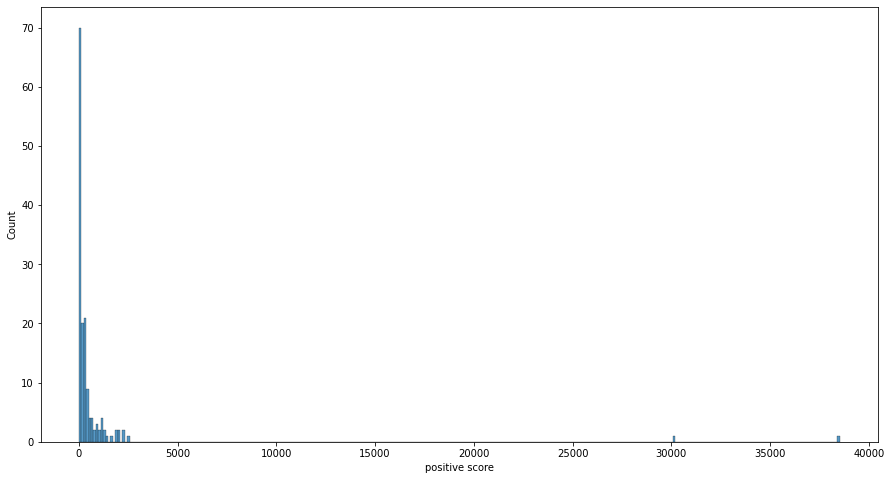

In [ ]:
plt.figure(figsize = (15, 8))
sns.histplot(x = df['positive score'])
plt.show()

## From the above bar graph it is clear that, there are reports which contain positve words more than 36,000, that leads to the conclusion that documents has a great positve effects.

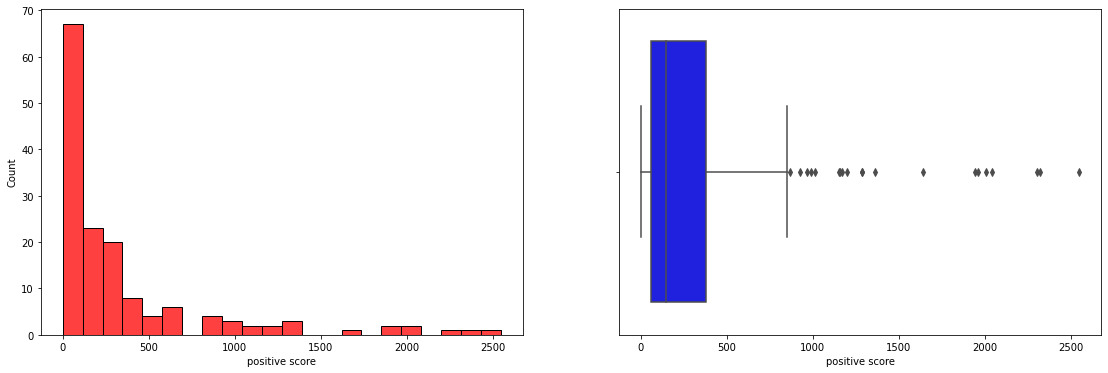

In [ ]:
pos = df[df['positive score'] < 30000]
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = pos['positive score'], color = 'r')
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['positive score'], color = 'b')
plt.show()

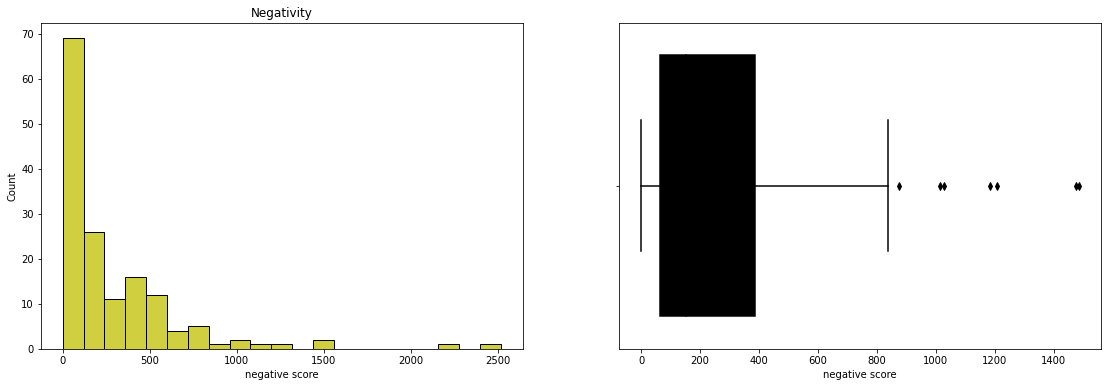

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['negative score'], color = 'y')
plt.title('Negativity')
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['negative score'], color = 'black')
plt.show()

## Positive and Negative score follows Weibull distributions, from this it becomes easier for use to predict or calculate the score of documentation with the help of pdf.

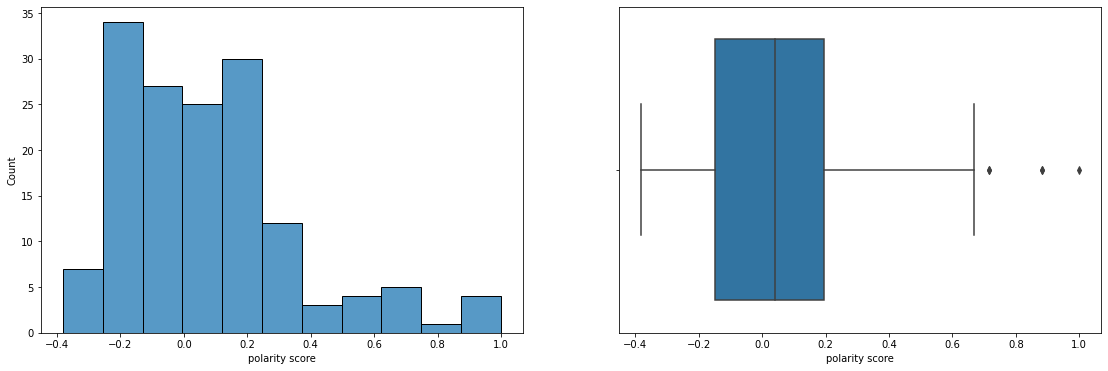

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['polarity score'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['polarity score'])
plt.show()

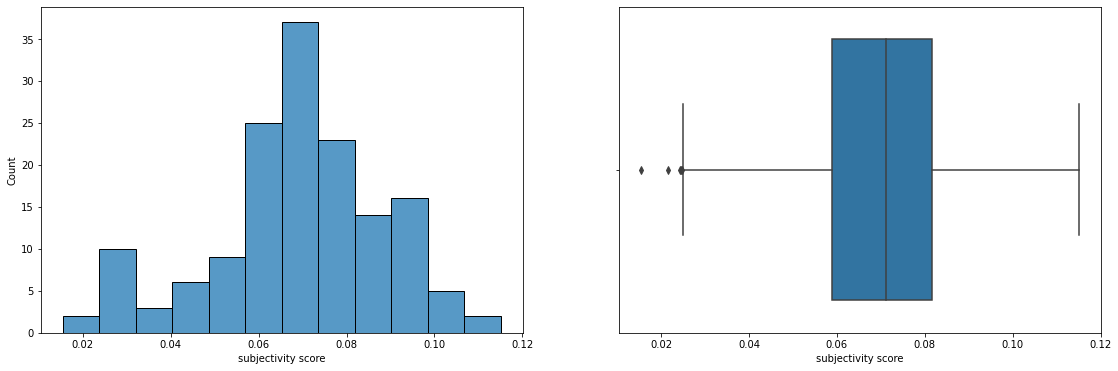

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['subjectivity score'],)
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['subjectivity score'])
plt.show()

## Subjectivity score is almost normal, it amplies that it is randomly speard over the data.

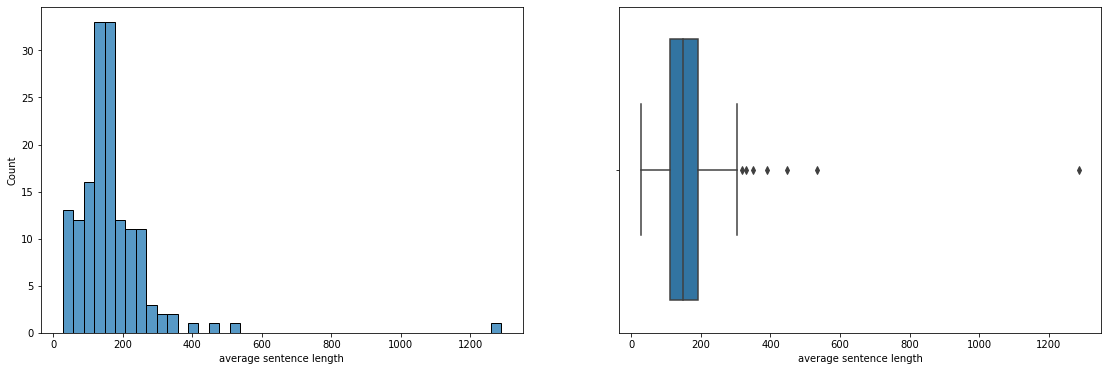

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['average sentence length'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['average sentence length'])
plt.show()

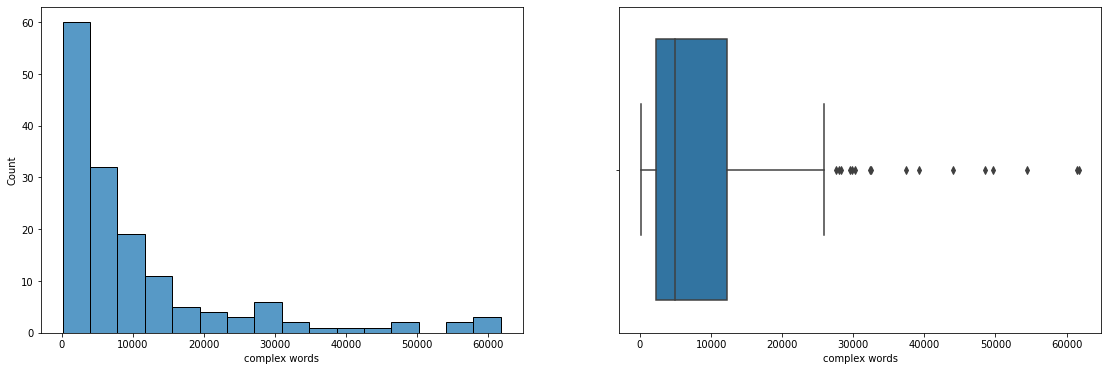

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['complex words'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['complex words'])
plt.show()

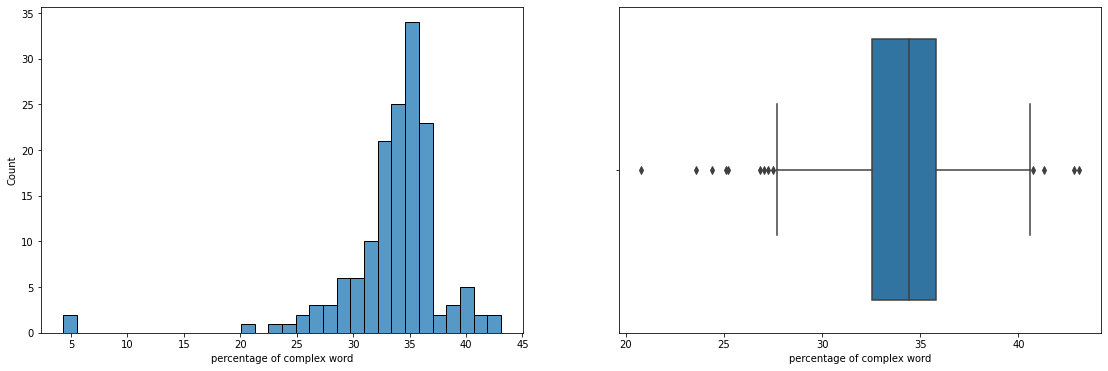

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['percentage of complex word'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['percentage of complex word'])
plt.show()

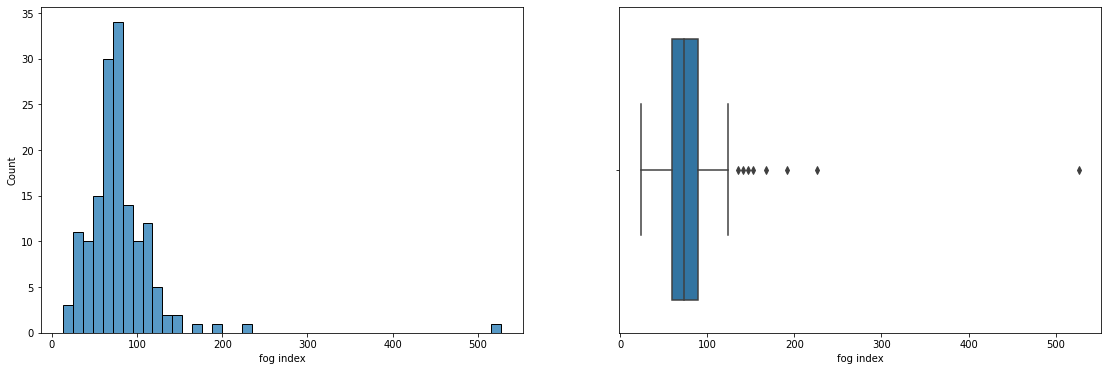

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['fog index'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['fog index'])
plt.show()

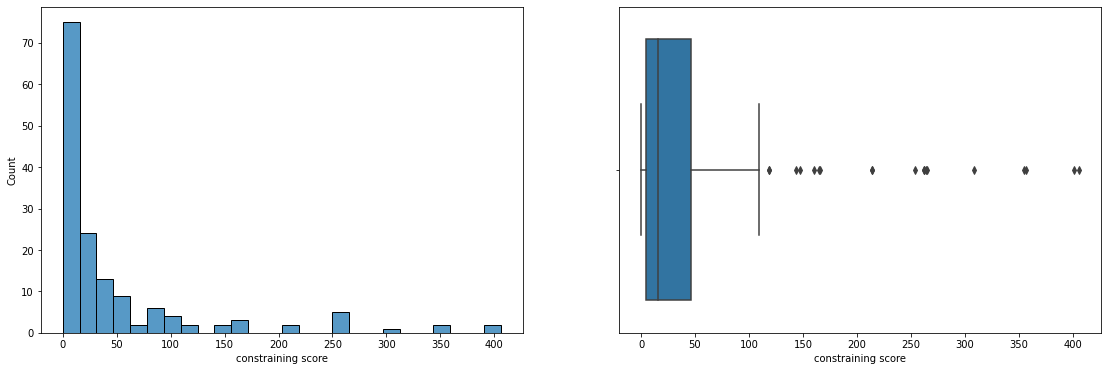

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['constraining score'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['constraining score'])
plt.show()

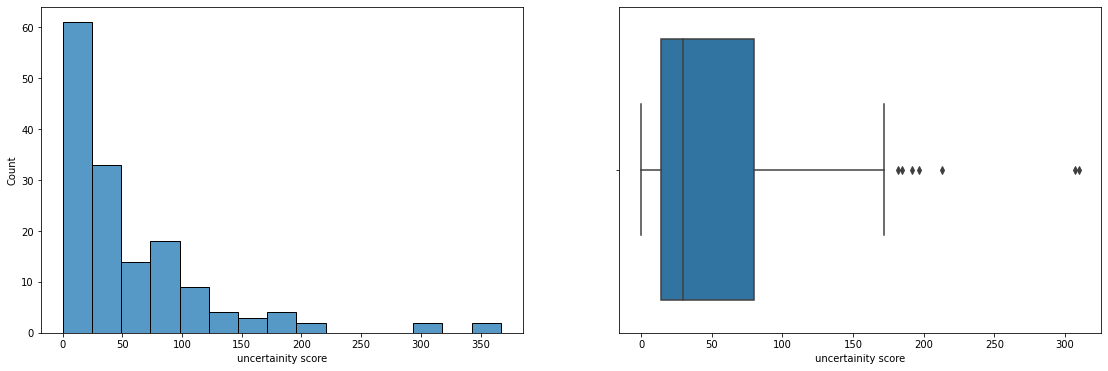

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['uncertainity score'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['uncertainity score'])
plt.show()

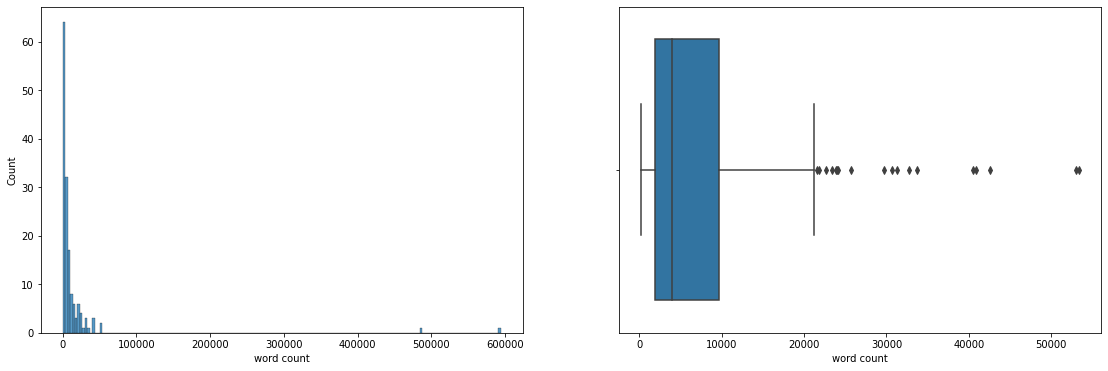

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['word count'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['word count'])
plt.show()

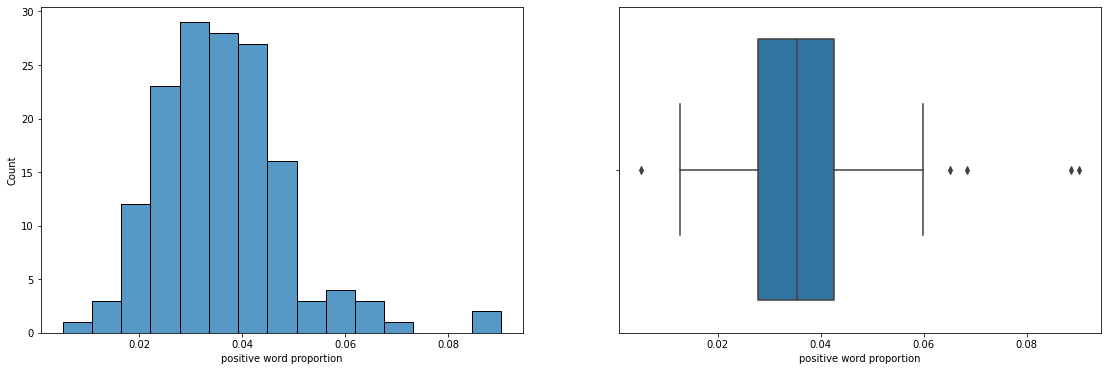

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['positive word proportion'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['positive word proportion'])
plt.show()

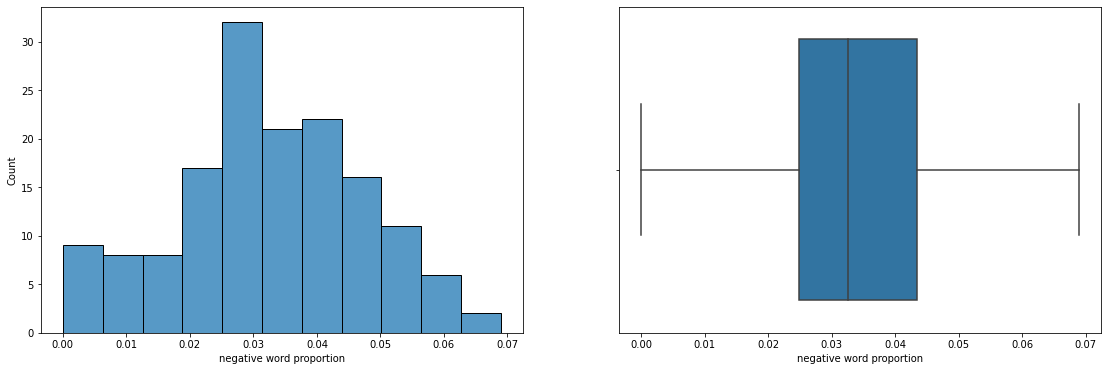

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['negative word proportion'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['negative word proportion'])
plt.show()

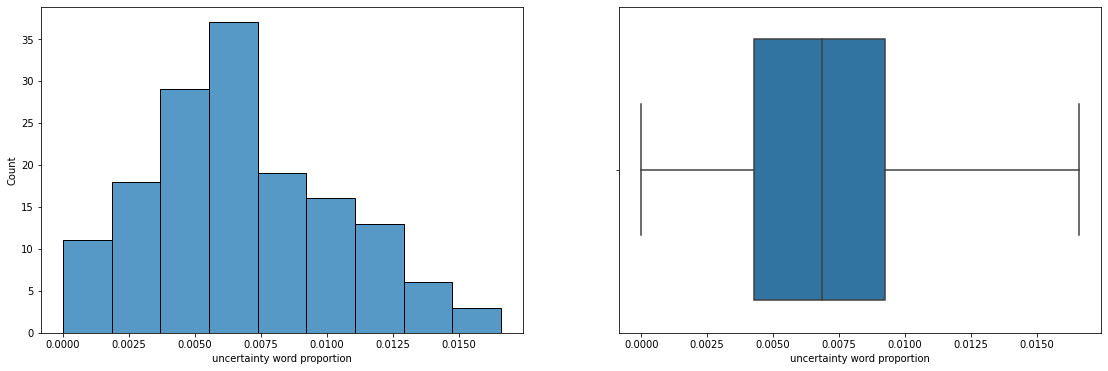

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['uncertainty word proportion'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['uncertainty word proportion'])
plt.show()

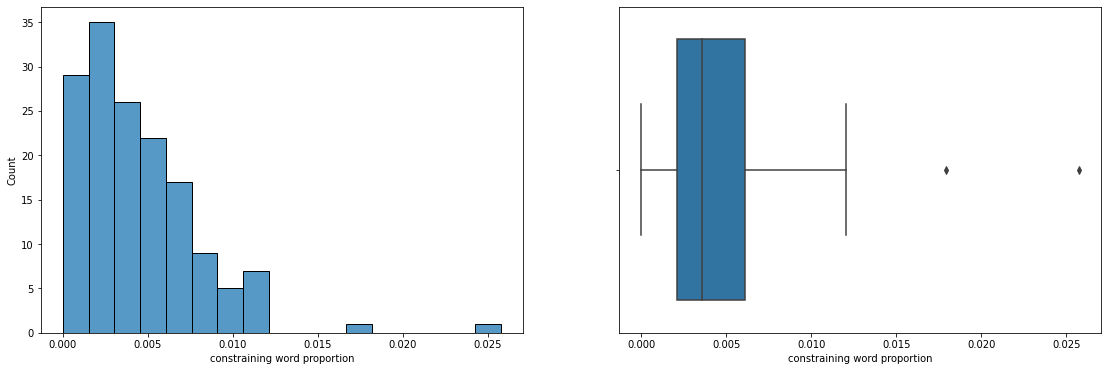

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['constraining word proportion'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['constraining word proportion'])
plt.show()

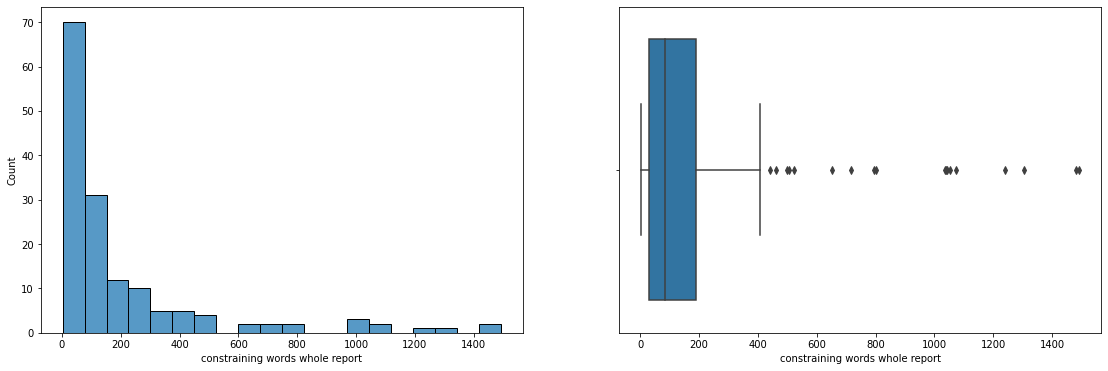

In [ ]:
plt.figure(figsize = (19, 6))
plt.subplot(1, 2, 1)
sns.histplot(x = df['constraining words whole report'])
plt.subplot(1, 2, 2)
sns.boxplot(x = pos['constraining words whole report'])
plt.show()

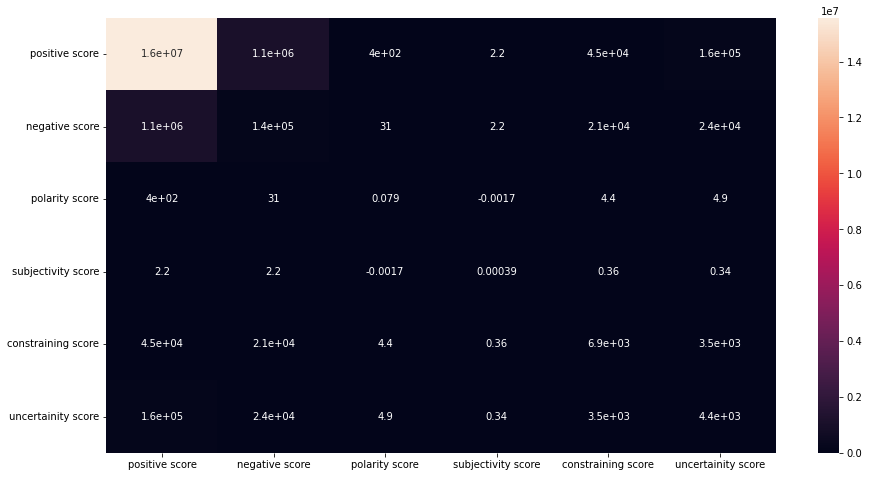

In [ ]:
plt.figure(figsize = [15, 8])
sns.heatmap(df[['positive score', 'negative score', 'polarity score',
       'subjectivity score', 'constraining score',
       'uncertainity score']].cov() , annot = True)
plt.show()

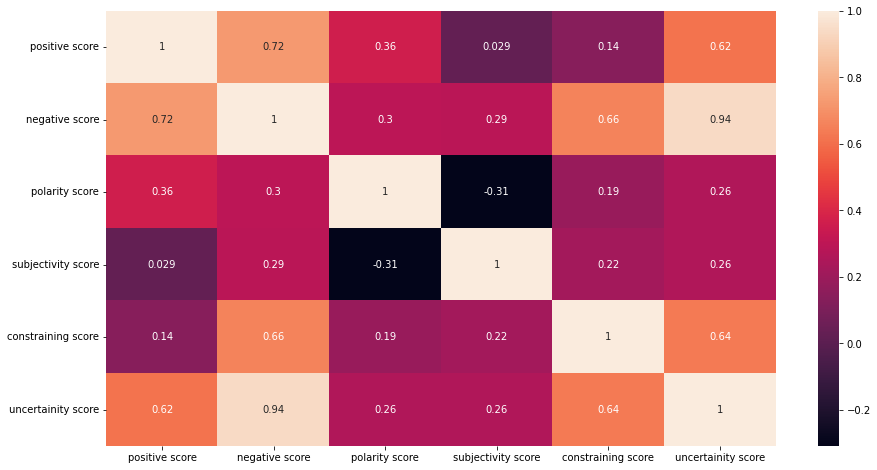

In [ ]:
plt.figure(figsize = [15, 8])
sns.heatmap(df[['positive score', 'negative score', 'polarity score',
       'subjectivity score', 'constraining score',
       'uncertainity score']].corr() , annot = True)
plt.show()

# From the covaraince and correlation we chose, which score to select for further analysis.

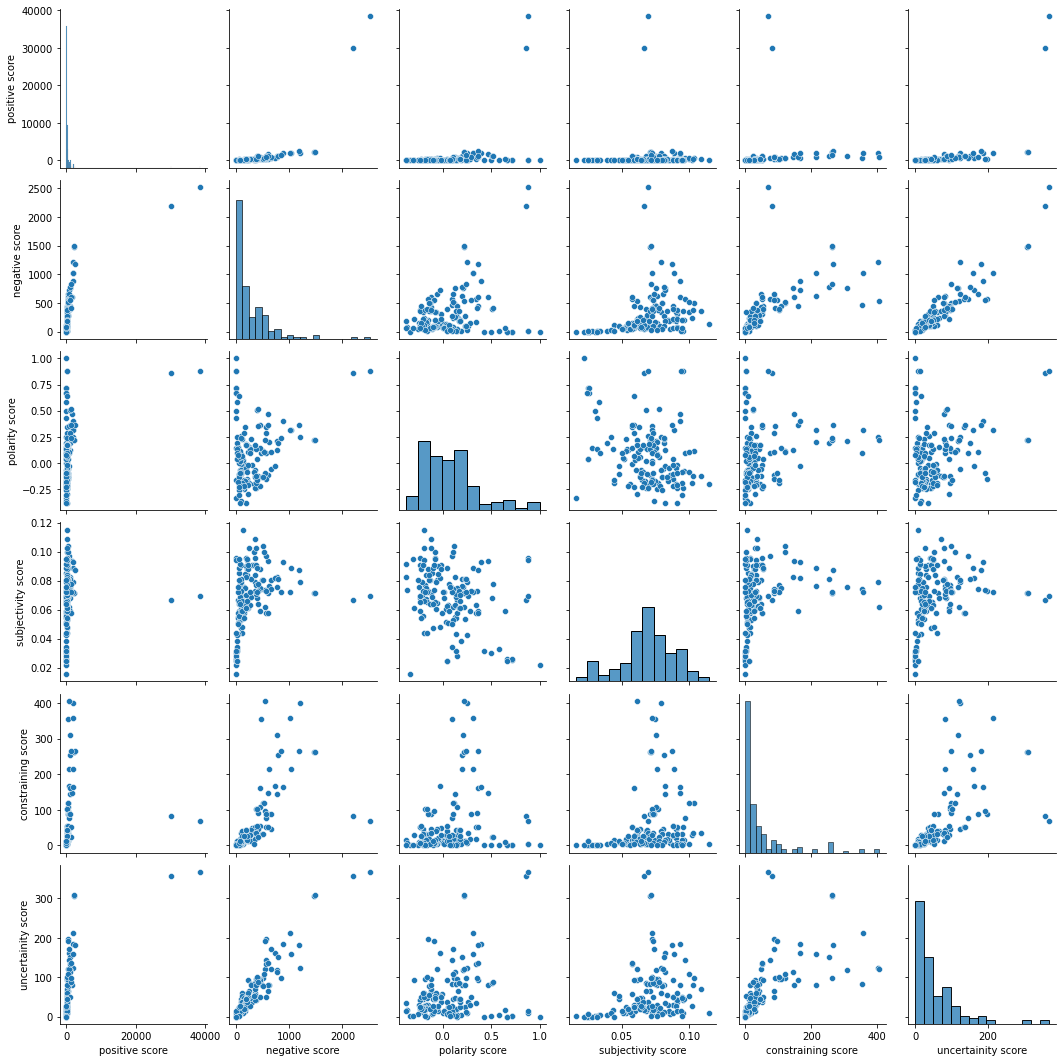

In [ ]:
sns.pairplot(df[['positive score', 'negative score', 'polarity score',
       'subjectivity score', 'constraining score',
       'uncertainity score']])
plt.show()

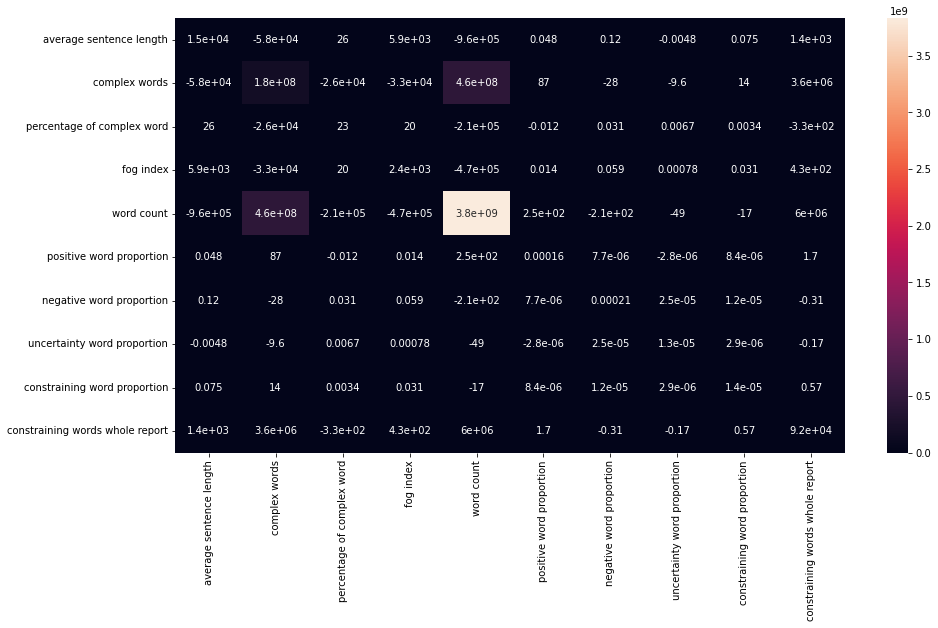

In [ ]:
plt.figure(figsize = [15, 8])
sns.heatmap(df[['average sentence length', 'complex words',
       'percentage of complex word', 'fog index','word count', 'positive word proportion',
       'negative word proportion', 'uncertainty word proportion',
       'constraining word proportion', 'constraining words whole report']].cov(), annot = True)
plt.show()

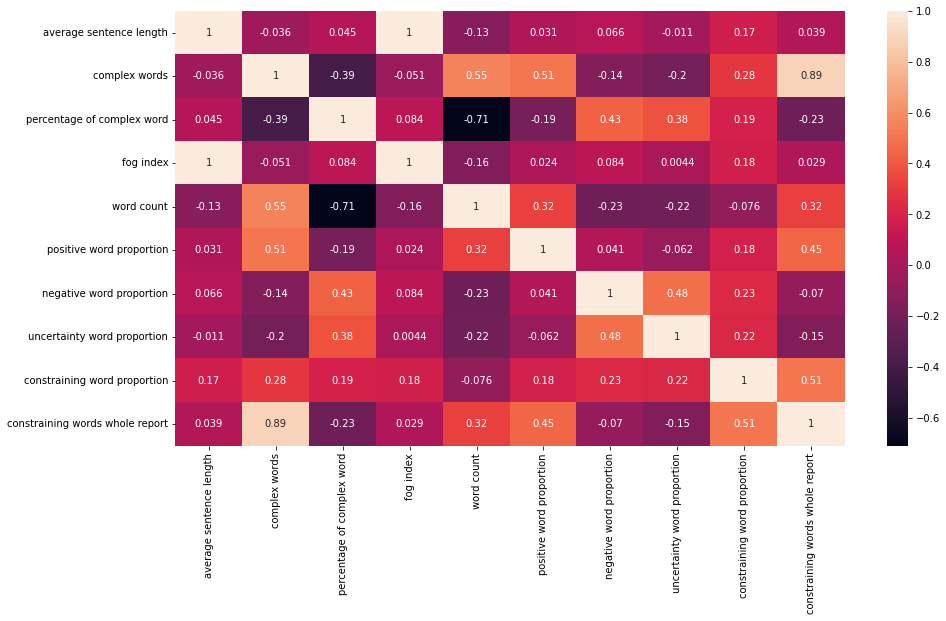

In [ ]:
plt.figure(figsize = [15, 8])
sns.heatmap(df[['average sentence length', 'complex words',
       'percentage of complex word', 'fog index','word count', 'positive word proportion',
       'negative word proportion', 'uncertainty word proportion',
       'constraining word proportion', 'constraining words whole report']].corr(), annot = True)
plt.show()

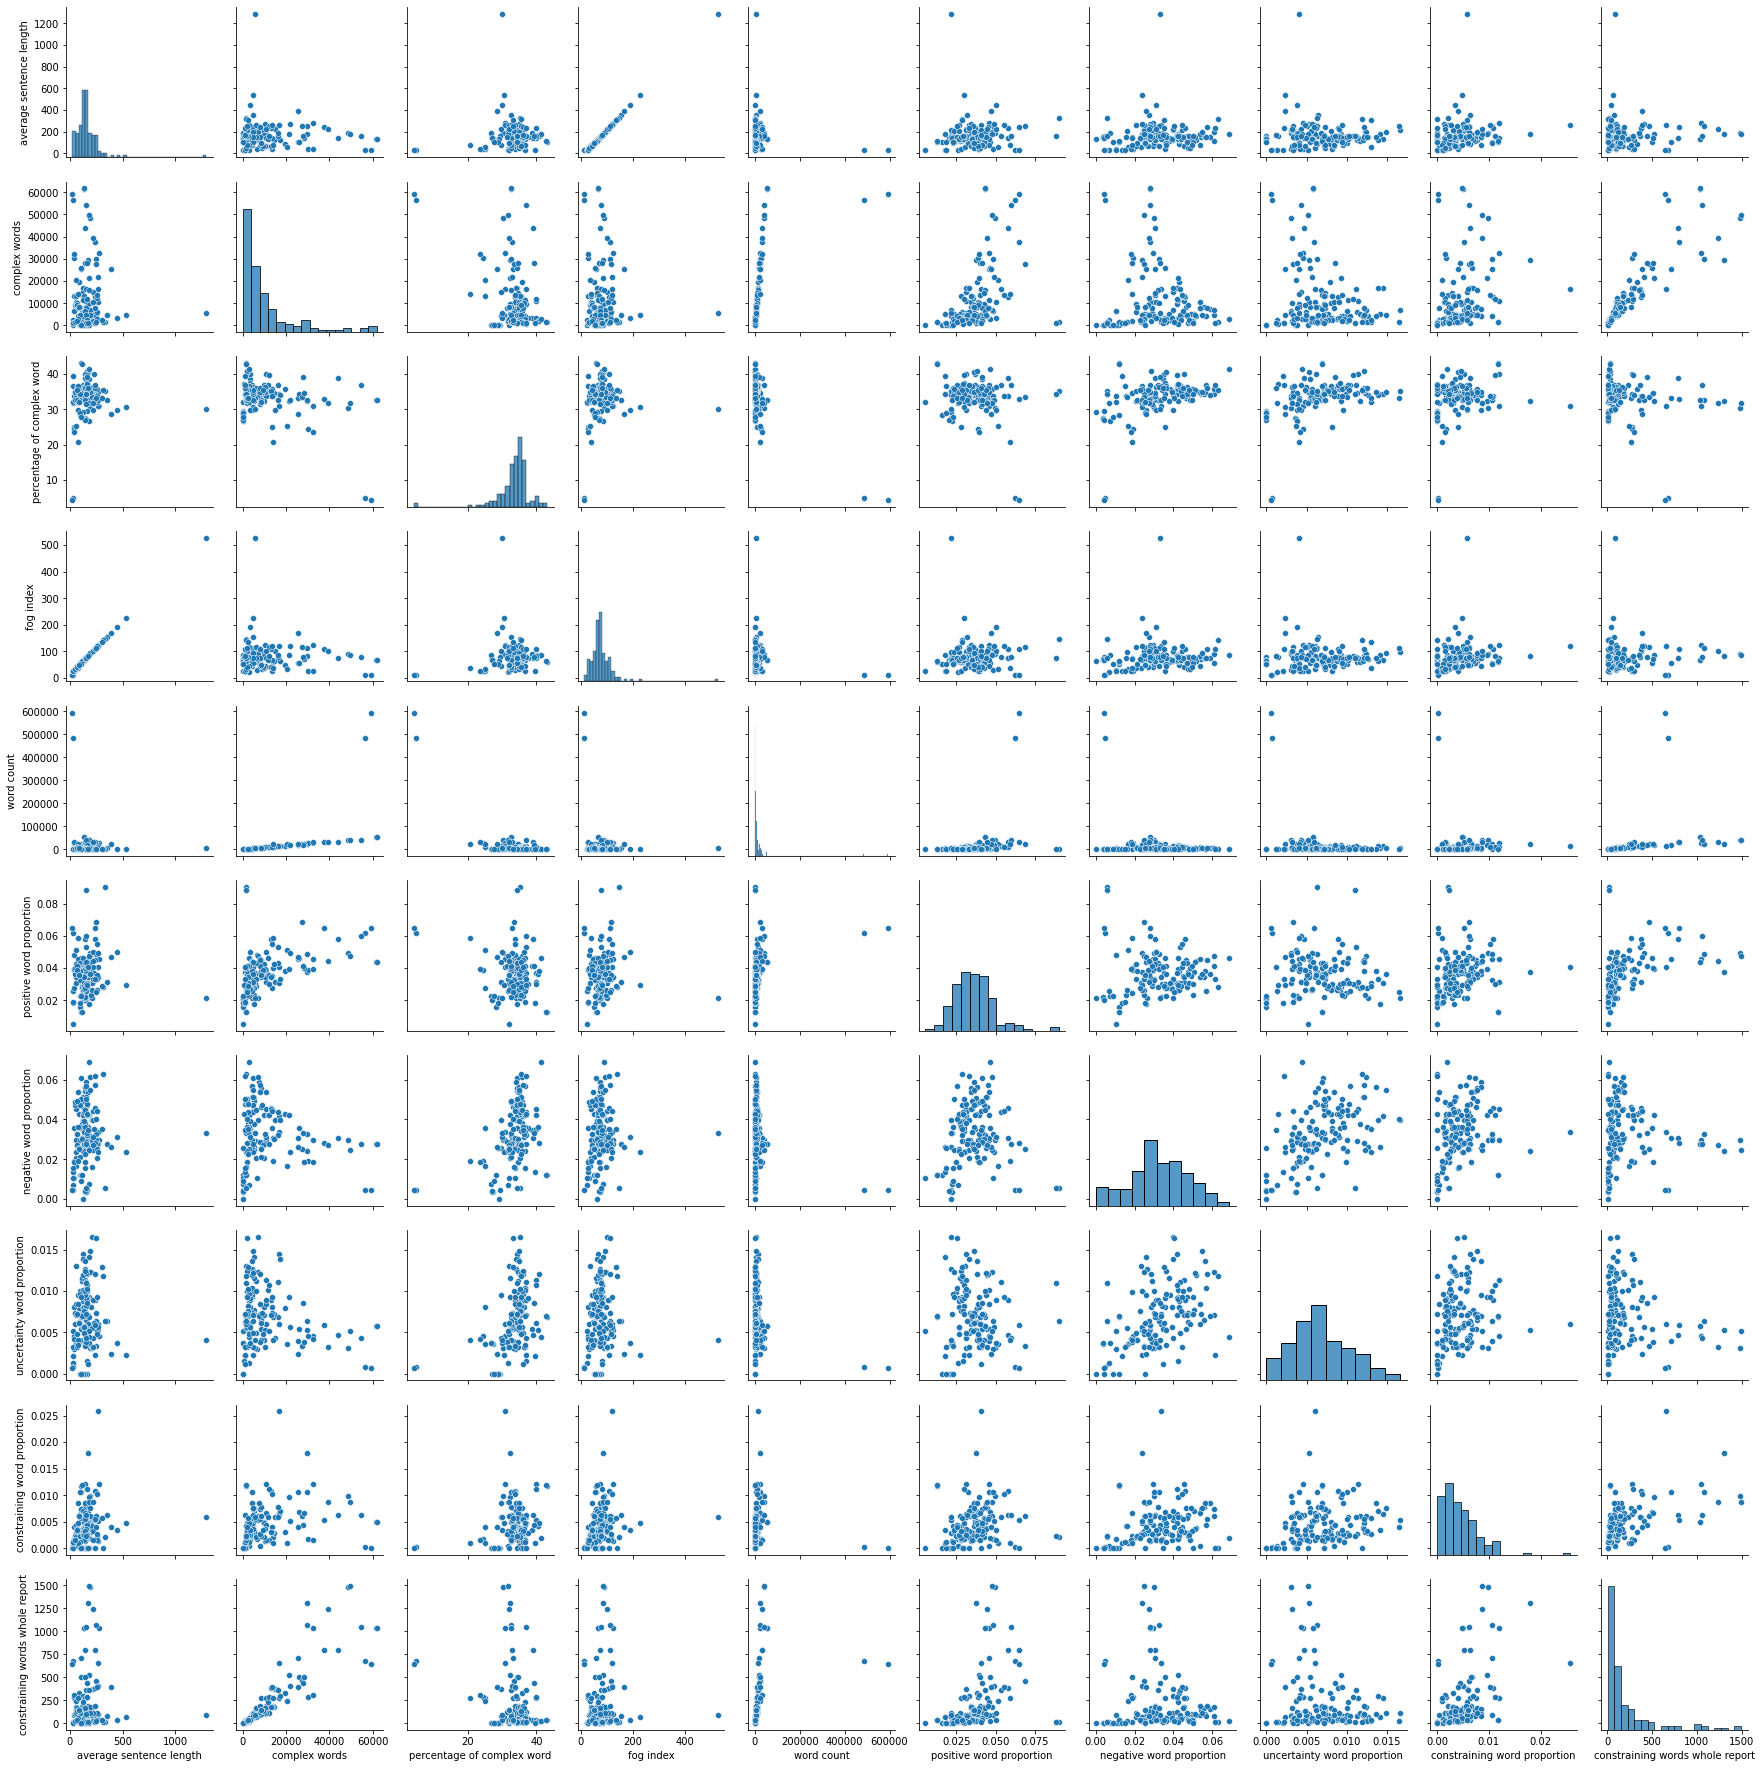

In [ ]:
sns.pairplot(df[['average sentence length', 'complex words',
       'percentage of complex word', 'fog index','word count', 'positive word proportion',
       'negative word proportion', 'uncertainty word proportion',
       'constraining word proportion', 'constraining words whole report']])
plt.show()

# *Bivariate Analysis*

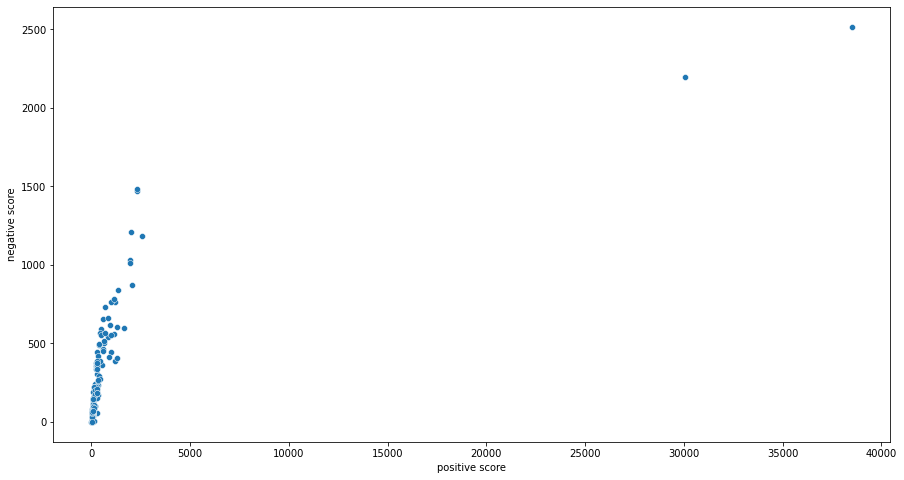

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['positive score'], y = df['negative score'], data = df)
plt.show()

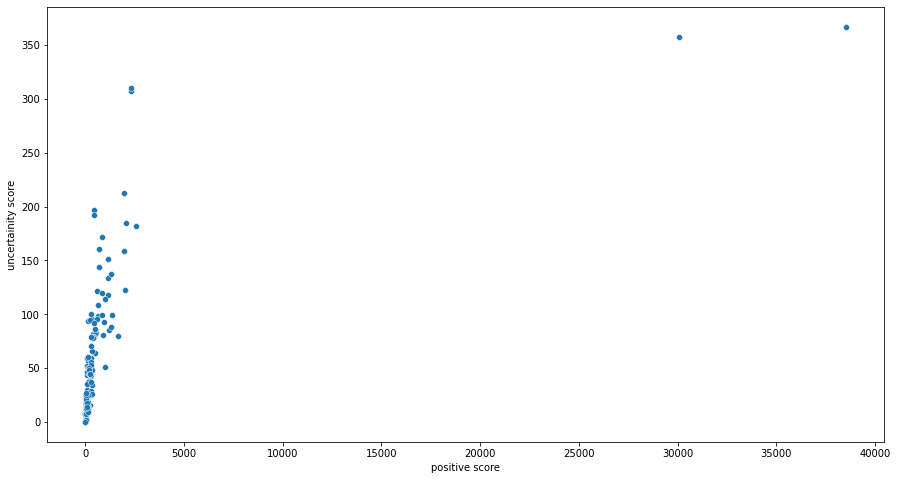

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['positive score'], y = df['uncertainity score'], data = df)
plt.show()

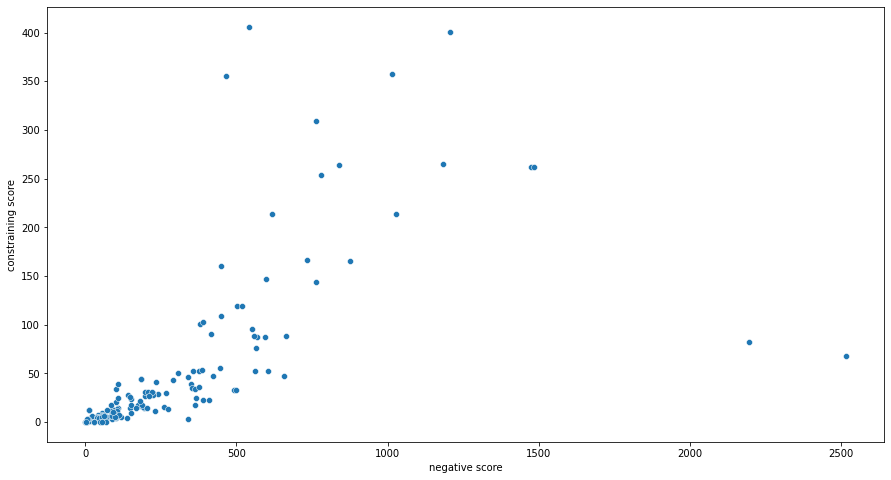

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['negative score'], y = df['constraining score'], data = df)
plt.show()

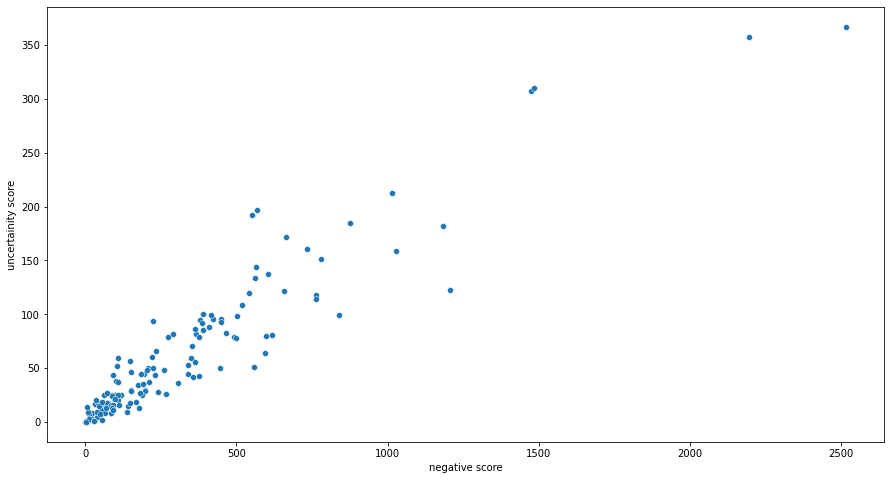

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['negative score'], y = df['uncertainity score'], data = df)
plt.show()

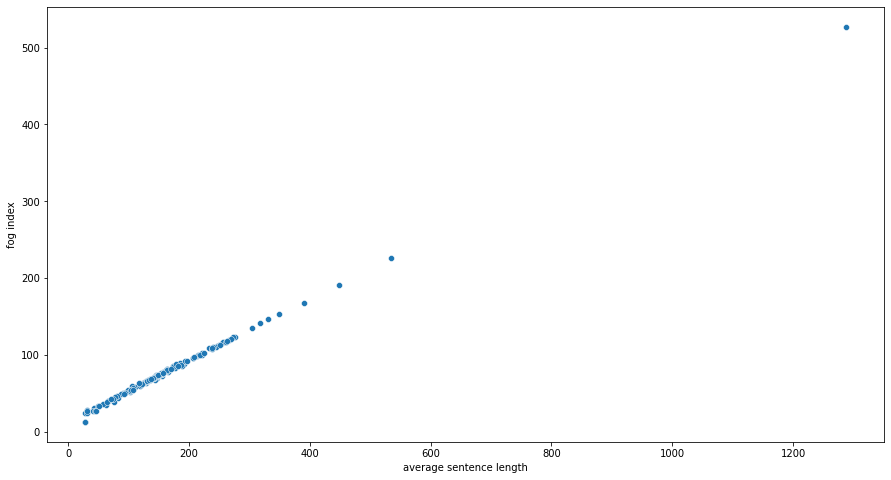

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['average sentence length'], y = df['fog index'], data = df)
plt.show()

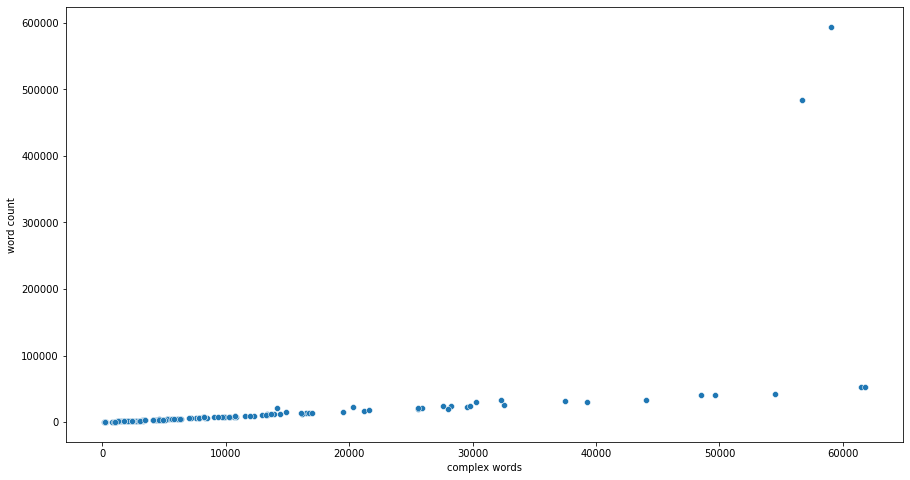

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['complex words'], y = df['word count'], data = df)
plt.show()

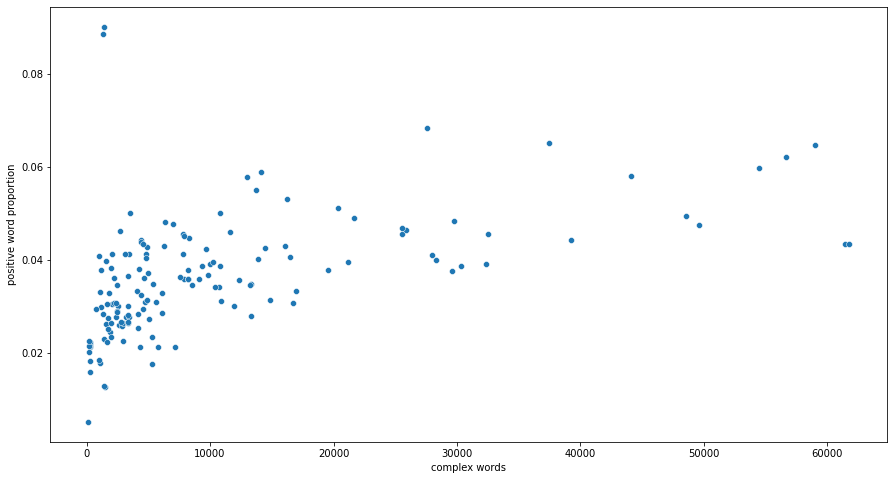

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['complex words'], y = df['positive word proportion'], data = df)
plt.show()

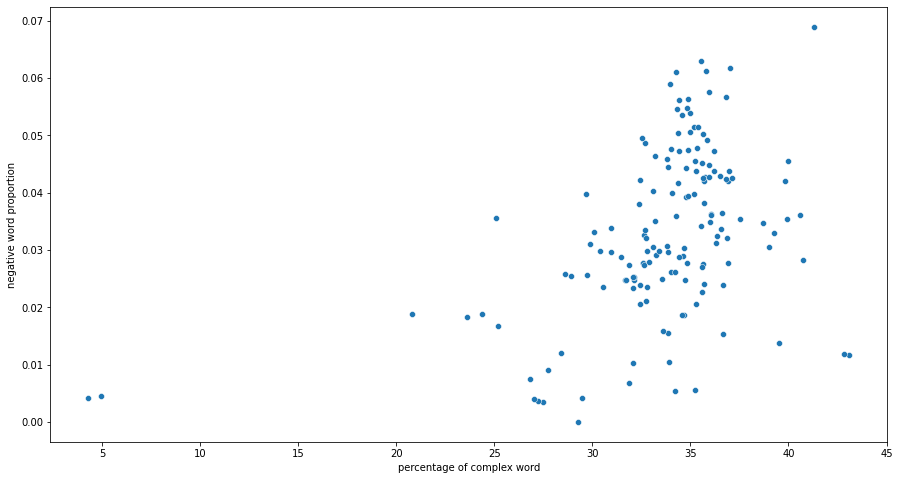

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['percentage of complex word'], y = df['negative word proportion'], data = df)
plt.show()

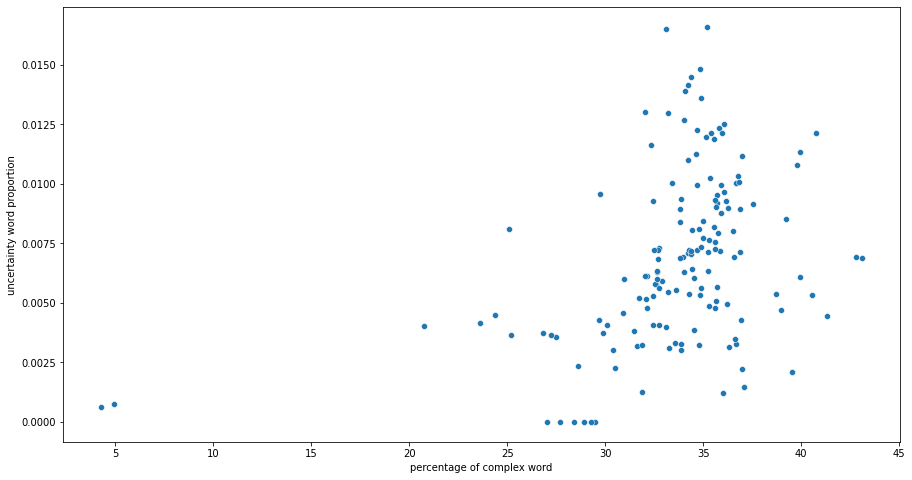

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['percentage of complex word'], y = df['uncertainty word proportion'], data = df)
plt.show()

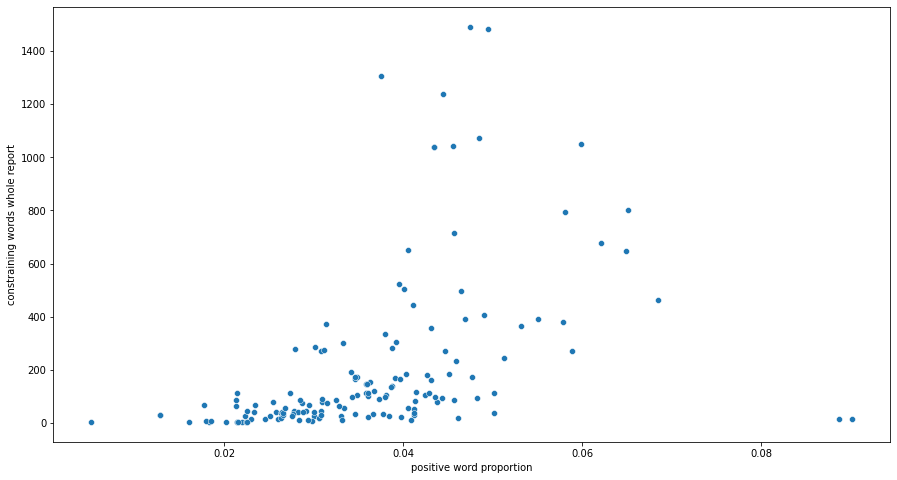

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['positive word proportion'], y = df['constraining words whole report'], data = df)
plt.show()

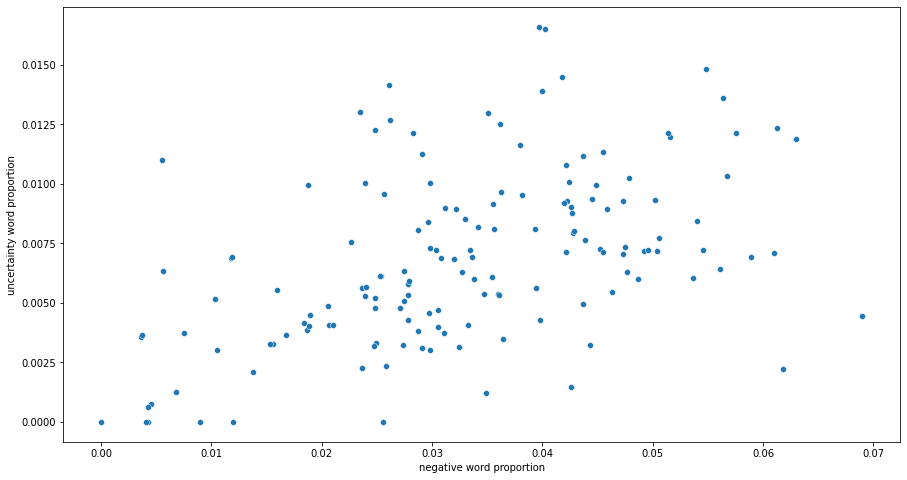

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['negative word proportion'], y = df['uncertainty word proportion'], data = df)
plt.show()

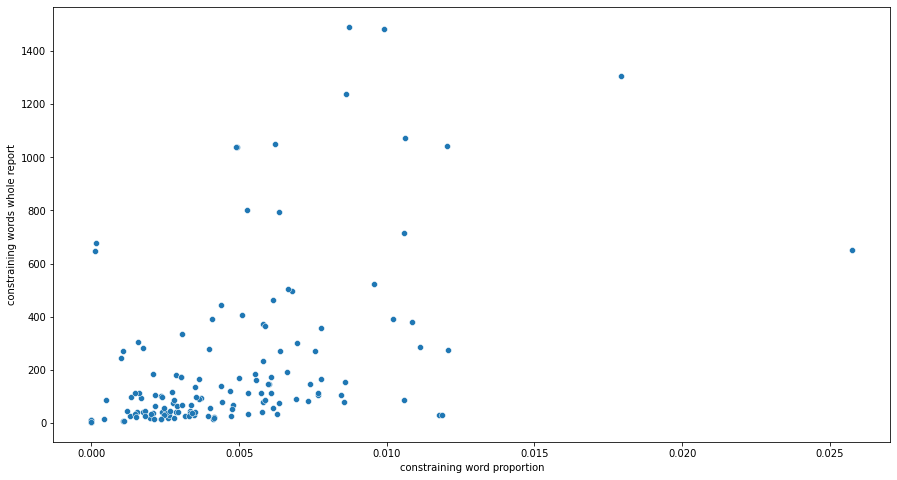

In [ ]:
plt.figure(figsize = [15, 8])
sns.scatterplot(x = df['constraining word proportion'], y = df['constraining words whole report'], data = df)
plt.show()